In [1]:
from sklearn import tree

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

directory_2='C:\\Users\\poll\\zzz_Data_science\\1_intro_TO_DS_karpov\\ML_datas\\'

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:50% !important;hight:50% !important;}</style>"
HTML(style)

In [3]:
sns.set(rc={'figure.figsize':(9,6)})

# ==========================================================

In [4]:
titanic_data=pd.read_csv(directory_2+'titanic\\train.csv')

titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
X.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S

In [7]:
Y = titanic_data['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
clf=tree.DecisionTreeClassifier(criterion='entropy')#criterion='entropy'

In [9]:
#clf.fit(X,Y)#error1 - cant work with strings, we have to convert strings to numbs

In [10]:
X.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S

In [11]:
X=pd.get_dummies(X)#convert variables to allowd format
X.head()

Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [12]:
#kill extra colunm with sex_male, because we have Sex_female, wich is enough for us


In [13]:
clf=tree.DecisionTreeClassifier(criterion='entropy')#criterion='entropy'

In [14]:
#clf.fit(X,Y)#error2- cant work with NaN, we have to convert strings to numbs

In [15]:
#fix problem with NaN lines- add where median

X = X.fillna({'Age': X['Age'].median()})

In [16]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [17]:
clf=tree.DecisionTreeClassifier(criterion='entropy')#criterion='entropy'

In [18]:
clf.fit(X,Y)#error2 - cant work with NaN, we have to convert strings to numbs

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
import sklearn

#print('The scikit-learn version is {}.'.format(sklearn.__version__))
#tree.plot_tree(clf , feature_names=list(X),class_names=['Negative','Positive'], filled=True)
#tree.plot_tree(clf)

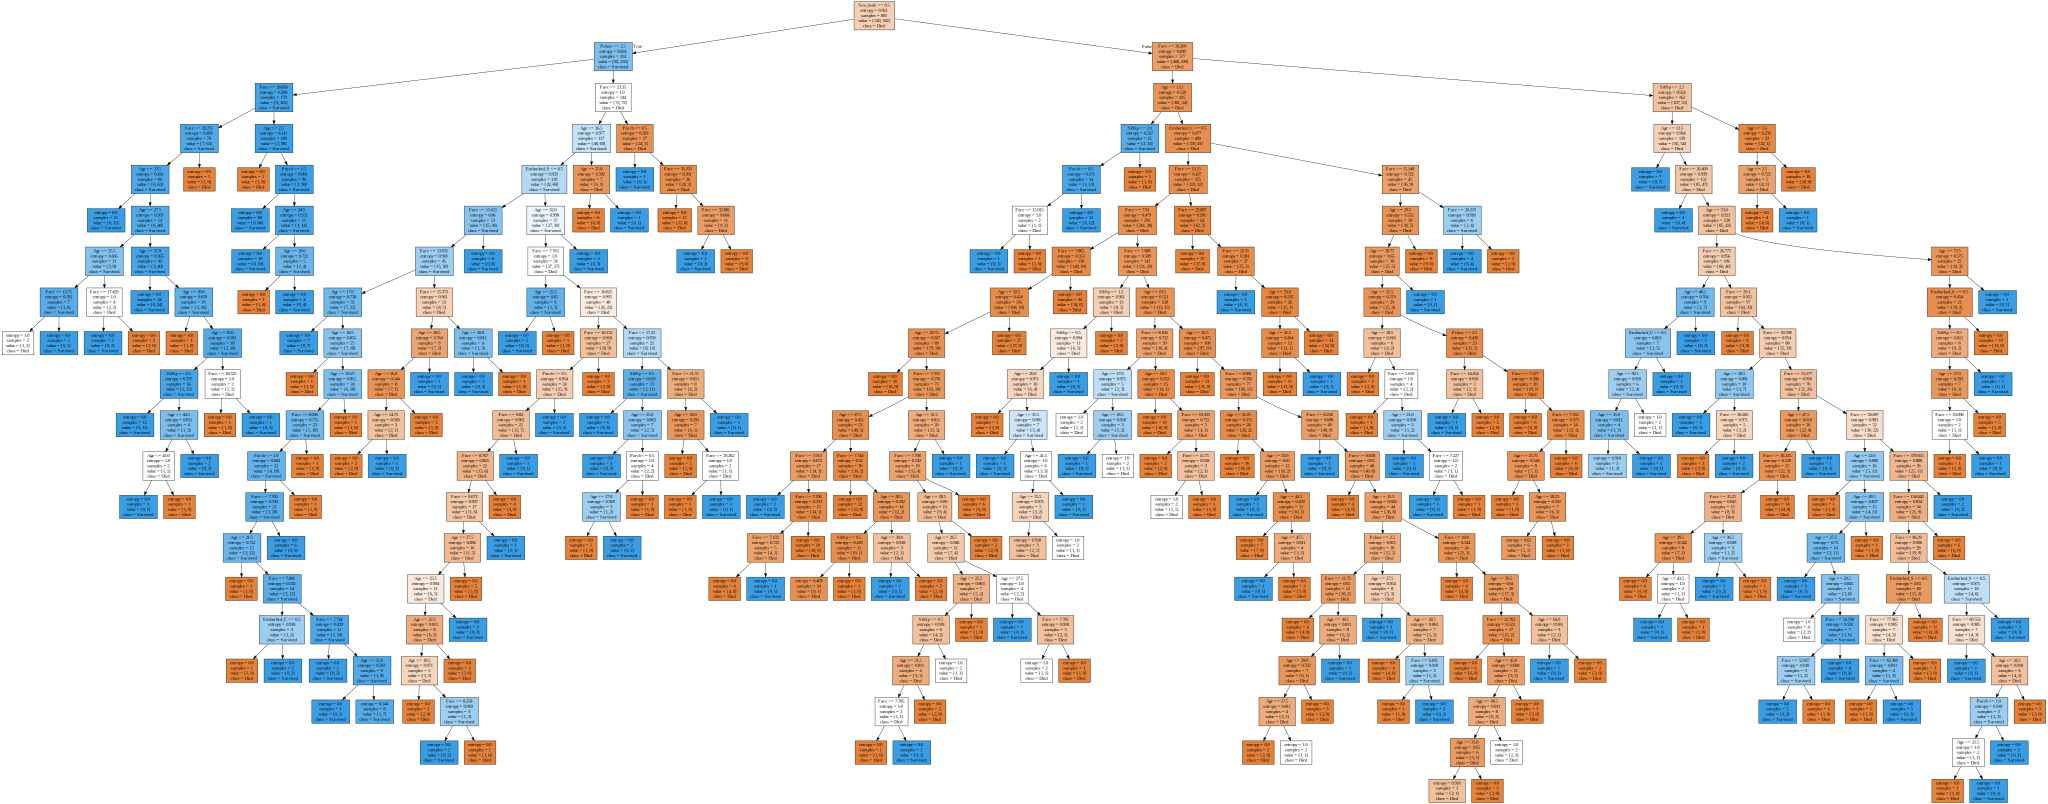

0.9797979797979798

In [20]:
graph = Source(tree.export_graphviz (clf, out_file=None
                                    ,feature_names=list(X),class_names=['Died','Survived']
                                    , filled = True))
display(SVG(graph.pipe(format = 'svg')))
clf.score(X,Y)

In [21]:
X.head()

Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33, random_state=42)

In [24]:
print(X_train.shape,type(X_train))
print(X_test.shape,type(X_test))

print(y_train.shape,type(y_train))
print(y_test.shape,type(y_test))
#clf.fit(X_train,y_train)

(596, 10) <class 'pandas.core.frame.DataFrame'>
(295, 10) <class 'pandas.core.frame.DataFrame'>
(596,) <class 'pandas.core.series.Series'>
(295,) <class 'pandas.core.series.Series'>


In [25]:
clf.score(X,Y)#error2 - cant work with NaN, we have to convert strings to numbs

0.9797979797979798

In [26]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))# NOT REALLY GOOD

0.9798657718120806
0.7762711864406779


In [28]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)#criterion='entropy'
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test)) #BETTER!

0.8238255033557047
0.8203389830508474


# ------------------------------------------------------------------------

In [30]:
max_depth_values = range(1,100)
score_data = pd.DataFrame()
from sklearn.model_selection import cross_val_score

In [31]:
for max_depth in max_depth_values:
    clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)#criterion='entropy'
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score =clf.score(X_test,y_test) 
    
    mean_cross_val_score = cross_val_score(clf,X_train,y_train,cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    
    score_data = score_data.append(temp_score_data)
    

In [32]:
score_data.head()

max_depth  train_score  test_score  cross_val_score
0          1     0.781879    0.796610         0.781857
0          2     0.805369    0.776271         0.768553
0          3     0.823826    0.820339         0.788678
0          4     0.833893    0.823729         0.783580
0          5     0.840604    0.806780         0.796942

In [33]:
score_data_long = pd.melt(score_data,id_vars=['max_depth'],value_vars=['train_score','test_score','cross_val_score'],
                          var_name ='set_type',value_name = 'score')

In [34]:
score_data_long.head()

max_depth     set_type     score
0          1  train_score  0.781879
1          2  train_score  0.805369
2          3  train_score  0.823826
3          4  train_score  0.833893
4          5  train_score  0.840604

In [35]:
score_data_long.query("set_type == 'cross_val_score'").sort_values('score',ascending = False).head(3)

max_depth         set_type     score
203          6  cross_val_score  0.797069
215         18  cross_val_score  0.796997
202          5  cross_val_score  0.796942

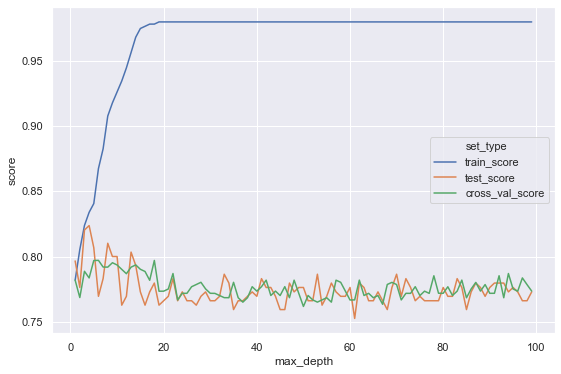

In [36]:
sns.lineplot(x="max_depth", y="score", hue = "set_type", data=score_data_long)

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)#criterion='entropy'

In [39]:
cross_val_score(clf,X_train,y_train,cv=5)#точность которую показал наш классификатор, разбив Х и У трейн на 5 == кусков

array([0.76666667, 0.80833333, 0.78991597, 0.74789916, 0.80508475])

In [40]:
cross_val_score(clf,X_train,y_train,cv=5).mean()

0.7835799743626264

In [41]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [42]:
best_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
best_clf.score(X_test,y_test)

#cross_val_score(best_clf,X_test,y_test,cv=5).mean()

0.8033898305084746

# ==============================================
# 2.6

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
params = {'criterion':['gini','entropy'],'max_depth': range(1,30)}

grid_search_cv_clf = GridSearchCV(clf,params, cv=5)

grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [47]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [48]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test,y_test)

0.7966101694915254

In [49]:
from sklearn.metrics import precision_score, recall_score

In [50]:
y_pred_1 = best_clf.predict(X_test)

In [51]:
precision_score(y_true=y_test,y_pred=y_pred_1)

0.8125

In [52]:
recall_score(y_true=y_test,y_pred=y_pred_1)

0.65

In [53]:
y_pred_1

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

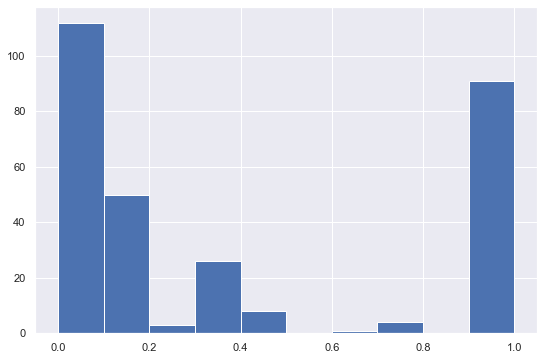

In [54]:
y_predicted_prob = best_clf.predict_proba(X_test)
pd.Series(y_predicted_prob[:, 1]).hist()

In [55]:
y_pred_2=np.where(y_predicted_prob[:, 1] > 0.1 ,1 , 0)#>0.2

In [56]:
print(precision_score(y_true=y_test,y_pred=y_pred_2))
print(recall_score(y_true=y_test,y_pred=y_pred_2))

0.5573770491803278
0.85


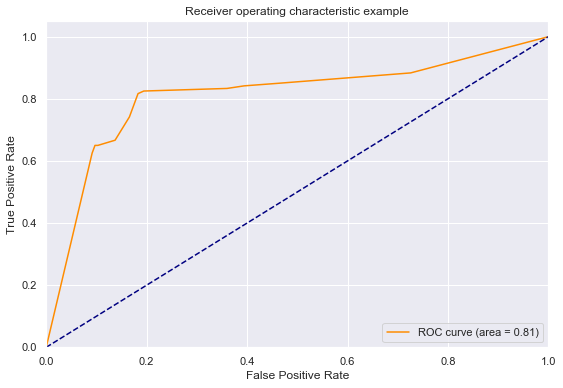

In [57]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# ------------------------------------------------------------------------------------
# 3.2

In [58]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3, min_samples_split=100,min_samples_leaf=10)

In [59]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

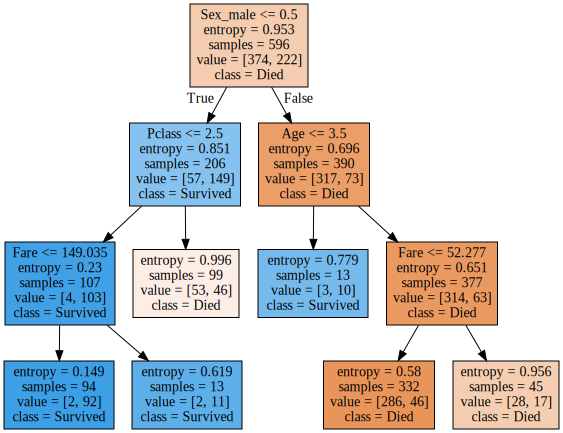

In [60]:
graph = Source(tree.export_graphviz (clf, out_file=None
                                    ,feature_names=list(X),class_names=['Died','Survived']
                                    , filled = True))
display(SVG(graph.pipe(format = 'svg')))
#clf.score(X,Y)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators':[10,20,30], 'max_depth': [2,5,7,10]}

grid_search_cv_clf = GridSearchCV(clf_rf,parametrs,cv = 5)
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [63]:
print(grid_search_cv_clf.best_params_)
best_clf = grid_search_cv_clf.best_estimator_

best_clf.score(X_test, y_test)

{'max_depth': 7, 'n_estimators': 10}


0.8033898305084746

In [64]:
feature_importances = best_clf.feature_importances_

feature_importances_df = pd.DataFrame({'features':list(X_train),'feature_importances':feature_importances})

feature_importances_df.sort_values('feature_importances',ascending=False)

features  feature_importances
4        Fare             0.226960
6    Sex_male             0.207053
5  Sex_female             0.188191
1         Age             0.138053
0      Pclass             0.116488
3       Parch             0.039006
2       SibSp             0.028851
7  Embarked_C             0.028083
9  Embarked_S             0.015522
8  Embarked_Q             0.011793

# ------------------------------------------------------------------------------------


In [65]:
rf_heart_data=pd.read_csv(directory_2+'datasets_33180_43520_heart.csv')
rf_heart_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [66]:
X_train = rf_heart_data.drop(['target'],axis=1)
y_train = rf_heart_data['target']

In [67]:
rf_heart_data = RandomForestClassifier(10, max_depth = 5)
rf_heart_data.fit(X_train,y_train)
#predictions = rf.predict(x_test)

feature_importances = rf_heart_data.feature_importances_

feature_importances_df = pd.DataFrame({'features':list(X_train),'feature_importances':feature_importances})

feature_importances_df.sort_values('feature_importances',ascending=False)

features  feature_importances
12      thal             0.181591
10     slope             0.127053
9    oldpeak             0.122170
11        ca             0.119123
2         cp             0.102277
0        age             0.085863
7    thalach             0.065931
3   trestbps             0.063532
8      exang             0.062634
4       chol             0.037147
6    restecg             0.015414
1        sex             0.013229
5        fbs             0.004037

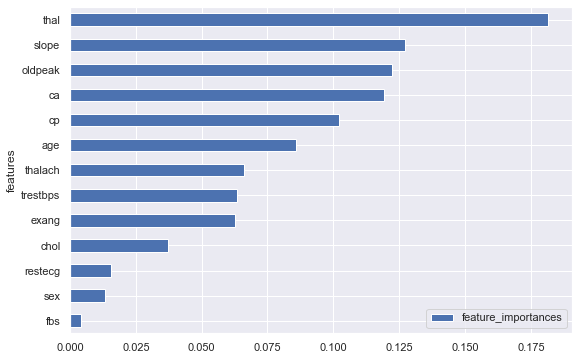

In [68]:
feature_importances_df.sort_values('feature_importances',ascending=True).plot.barh(x='features')

In [69]:
'''rf_heart_data = RandomForestClassifier()

parametrs = {'n_estimators':[10,20,30], 'max_depth': [2,5,7,10]}

grid_search_cv_clf = GridSearchCV(clf_rf,parametrs,cv = 5)
grid_search_cv_clf.fit(X_train,y_train)'''

"rf_heart_data = RandomForestClassifier()\n\nparametrs = {'n_estimators':[10,20,30], 'max_depth': [2,5,7,10]}\n\ngrid_search_cv_clf = GridSearchCV(clf_rf,parametrs,cv = 5)\ngrid_search_cv_clf.fit(X_train,y_train)"

In [70]:
'''grid_search_cv_clf.best_params_'''

'grid_search_cv_clf.best_params_'

In [71]:
'''best_clf = grid_search_cv_clf.best_estimator_

best_clf.score(X_test, y_test)'''

'best_clf = grid_search_cv_clf.best_estimator_\n\nbest_clf.score(X_test, y_test)'

In [72]:
'''feature_importances = best_clf.feature_importances_

feature_importances_df = pd.DataFrame({'features':list(X_train),'feature_importances':feature_importances})

feature_importances_df.sort_values('feature_importances',ascending=False)'''

"feature_importances = best_clf.feature_importances_\n\nfeature_importances_df = pd.DataFrame({'features':list(X_train),'feature_importances':feature_importances})\n\nfeature_importances_df.sort_values('feature_importances',ascending=False)"

# ======================================================
## 3.5 train mushroom

In [73]:
mashrooms_data=pd.read_csv(directory_2+'mushrooms\\training_mush.csv')
mashrooms_data.head()

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          2            0          3        1     5                1   
1          2            0          4        0     5                1   
2          2            0          3        0     2                1   
3          0            0          3        0     5                1   
4          2            3          3        1     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          0           9            1  ...   
1             0          1          10            0  ...   
2             0          0           7            0  ...   
3             1          0           2            0  ...   
4             0          0          10            1  ...   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       3                       7          0           2   
1                       7                       4          0           2   
2                       0                       4          0           2   
3                       7                       7          0           2   
4                       3                       6          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  class  
0            1          4                  3           5        0      0  
1            1          0                  7           4        0      1  
2            1          2                  1           5        1      1  
3            2          4                  7           3        1      0  
4            1          4                  2           5        0      0  

[5 rows x 23 columns]

In [74]:

X_train = mashrooms_data.drop(['class'],axis=1)
y_train = mashrooms_data['class']

In [75]:

clf_rf = RandomForestClassifier(random_state = 0)
parametrs = {'n_estimators':range(10,50,10), 'max_depth': range(1,12,2), 
            'min_samples_leaf':  range(1,7), 'min_samples_split':  range(2,9,2)}

grid_search_cv_clf = GridSearchCV(clf_rf,parametrs,cv = 3)
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [76]:

print(grid_search_cv_clf.best_params_)
best_clf = grid_search_cv_clf.best_estimator_

best_clf.fit(X_test, y_test)


{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [77]:
rf_mashrooms_data = RandomForestClassifier(max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10)
rf_mashrooms_data.fit(X_train,y_train)
#predictions = rf.predict(x_test)

feature_importances = rf_mashrooms_data.feature_importances_

feature_importances_df = pd.DataFrame({'features':list(X_train),'feature_importances':feature_importances})

feature_importances_df.sort_values('feature_importances',ascending=False)

features  feature_importances
7                  gill-size             0.160628
19         spore-print-color             0.111123
10                stalk-root             0.106433
18                 ring-type             0.097920
8                 gill-color             0.085461
4                       odor             0.083914
3                    bruises             0.054498
12  stalk-surface-below-ring             0.051690
11  stalk-surface-above-ring             0.046939
20                population             0.044152
21                   habitat             0.029255
6               gill-spacing             0.026651
17               ring-number             0.023035
14    stalk-color-below-ring             0.021379
9                stalk-shape             0.017762
5            gill-attachment             0.013706
13    stalk-color-above-ring             0.007076
16                veil-color             0.007023
2                  cap-color             0.005240
1                cap-surface             0.003635
0                  cap-shape             0.002480
15                 veil-type             0.000000

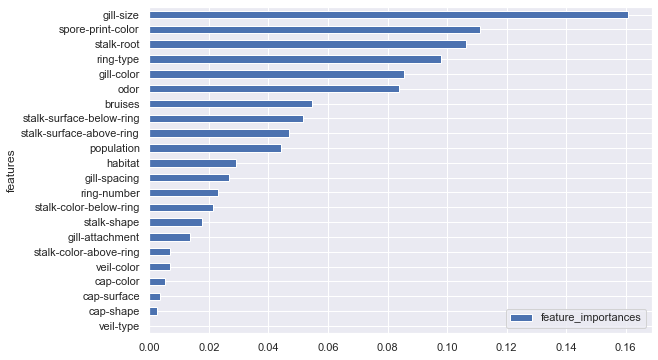

In [78]:
feature_importances_df.sort_values('feature_importances',ascending=True).plot.barh(x='features')

## 3.5 test mushroom

In [79]:
mashrooms_pred_data=pd.read_csv(directory_2+'mushrooms\\testing_mush.csv')
mashrooms_pred_data.head()

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          0            3          8        1     3                1   
1          5            3          4        1     5                1   
2          3            3          4        0     8                1   
3          3            2          2        0     7                1   
4          3            2          2        0     8                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          0           4            0  ...   
1             0          0          10            1  ...   
2             0          1           0            1  ...   
3             0          1           0            1  ...   
4             0          1           0            1  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                       6                       6   
2                         2                       7                       6   
3                         1                       6                       7   
4                         1                       6                       6   

   veil-type  veil-color  ring-number  ring-type  spore-print-color  \
0          0           2            1          4                  2   
1          0           2            1          4                  3   
2          0           2            1          0                  7   
3          0           2            1          0                  7   
4          0           2            1          0                  7   

   population  habitat  
0           3        3  
1           5        0  
2           4        4  
3           4        0  
4           4        4  

[5 rows x 22 columns]

In [80]:
y_pred_1 = rf_mashrooms_data.predict(mashrooms_pred_data)
print(y_pred_1)
print(len(y_pred_1))

print(pd.Series(y_pred_1).value_counts())

[0 0 1 ... 1 0 1]
2031
0    1055
1     976
dtype: int64


In [81]:
Y_true = pd.read_csv(directory_2+'mushrooms\\testing_y_mush.csv')
print(Y_true.size)
Y_true.head()

2031


class
0      0
1      0
2      1
3      1
4      1

In [82]:
y_pred_1 = pd.Series(y_pred_1)
print(y_pred_1.size)
y_pred_1 

2031


0       0
1       0
2       1
3       1
4       1
       ..
2026    1
2027    0
2028    1
2029    0
2030    1
Length: 2031, dtype: int64

[[1055    0]
 [   0  976]]


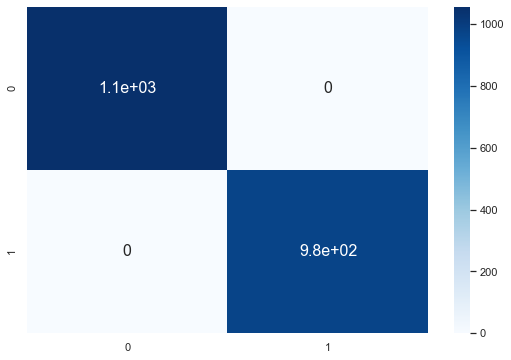

In [84]:
from sklearn.metrics import confusion_matrix#, plot_confusion_matrix

print(confusion_matrix(y_true = Y_true ,y_pred=y_pred_1))

sns.heatmap(confusion_matrix(y_true = Y_true ,y_pred=y_pred_1),annot = True, annot_kws = {'size':16},cmap="Blues")
#plot_confusion_matrix(rf_mashrooms_data,y_true = Y_true ,y_pred=y_pred_1)

In [85]:
rf_mashrooms_data.score(mashrooms_pred_data,Y_true)

1.0

# -------------------------------------------------------------------------------------------------------
## 3.5 train Star Ships

In [86]:
starSHIP_data=pd.read_csv(directory_2+'star_ship\\invasion.csv')
starSHIP_data.head()

class  g_reflection  i_reflection       speed  brightness  \
0  transport      2.190672      6.716633   62.168208    0.347465   
1  transport      3.453276      8.995909   62.994707    0.590094   
2  transport      2.432994      6.938691   62.245807    0.329288   
3    fighter      6.083763      3.019459   18.474555    0.174738   
4    fighter     12.876769      2.452950  195.805771    0.150446   

   time_of_observance     volume  
0              158221  44.932446  
1              385972  41.568300  
2              446482  40.123467  
3              210125  11.384865  
4               23109  11.328806

In [87]:
X_train = starSHIP_data.drop(['class'],axis=1)
y_train = starSHIP_data['class']

In [88]:
clf_rf = RandomForestClassifier(random_state = 0)
parametrs = {'n_estimators':range(5,25,5), 'max_depth': range(1,11,2), 
            'min_samples_leaf':  range(1,7), 'min_samples_split':  range(2,9,2)}

grid_search_cv_clf = GridSearchCV(clf_rf,parametrs,cv = 3)
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [89]:
print(grid_search_cv_clf.best_params_)
best_clf = grid_search_cv_clf.best_estimator_

best_clf.fit(X_train, y_train)
best_clf.score(X_train, y_train)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


1.0

In [90]:
#rf_mashrooms_data = RandomForestClassifier(max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10)
#rf_mashrooms_data.fit(X_train,y_train)
#predictions = rf.predict(x_test)

feature_importances = best_clf.feature_importances_

feature_importances_df = pd.DataFrame({'features':list(X_train),'feature_importances':feature_importances})

feature_importances_df.sort_values('feature_importances',ascending=False)

features  feature_importances
3          brightness             0.363803
5              volume             0.257661
2               speed             0.171441
1        i_reflection             0.124372
0        g_reflection             0.082723
4  time_of_observance             0.000000

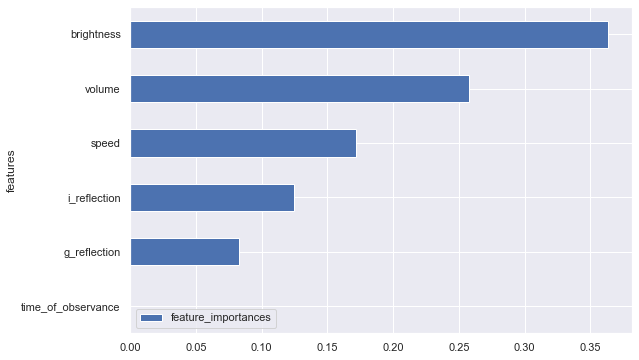

In [91]:
feature_importances_df.sort_values('feature_importances',ascending=True).plot.barh(x='features')

## 3.5 test star ships

In [92]:
starSHIP_pred_data=pd.read_csv(directory_2+'star_ship\\operative_information.csv')
starSHIP_pred_data.head()

g_reflection  i_reflection       speed  brightness  time_of_observance  \
0      7.516543      3.916691  513.954279    0.177247              105908   
1      4.322988      6.967689   63.752970    0.545922              277855   
2      4.595724      9.098297   62.233948    0.389201              160662   
3      2.689675      7.964869   62.475495    0.541081              162092   
4      8.075576      5.169719  336.441261    0.174757              466853   

      volume  
0  13.267224  
1  39.833130  
2  42.014556  
3  42.056829  
4  11.779813

In [93]:
y_pred_2 = best_clf.predict(starSHIP_pred_data)
print(y_pred_2)
print(len(y_pred_2))

print(pd.Series(y_pred_2).value_counts())

['fighter' 'transport' 'transport' ... 'transport' 'fighter' 'transport']
1500
fighter      675
transport    595
cruiser      230
dtype: int64


In [ ]:
#print(precision_score(y_true=y_test,y_pred=y_pred_2))
#print(recall_score(y_true=y_test,y_pred=y_pred_2))

# ----------------------------------------------------------------------------------------------------------
## 3.5 space danger

In [94]:
space_danger_data=pd.read_csv(directory_2+'star_ship\\space_can_be_a_dangerous_place.csv')
space_danger_data.head()

r    phi  peradventure_index  dustiness  black_hole_is_near  \
0  169.1  138.0             22.3212   0.706285                   0   
1   11.1  148.0              1.4652  -0.410512                   1   
2  274.6  201.0             36.2472   0.756457                   1   
3  172.8  173.0             22.8096   0.035221                   1   
4  223.3  222.0             29.4756   0.197271                   0   

   buggers_were_noticed  nearby_system_has_planemo  dangerous  
0                     1                          1          1  
1                     1                          1          1  
2                     1                          1          1  
3                     1                          1          1  
4                     1                          1          1

In [95]:
space_danger_data.info()

X_train = space_danger_data.drop(['dangerous'],axis=1)
y_train = space_danger_data['dangerous']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   r                          100000 non-null  float64
 1   phi                        100000 non-null  float64
 2   peradventure_index         100000 non-null  float64
 3   dustiness                  100000 non-null  float64
 4   black_hole_is_near         100000 non-null  int64  
 5   buggers_were_noticed       100000 non-null  int64  
 6   nearby_system_has_planemo  100000 non-null  int64  
 7   dangerous                  100000 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 6.1 MB


In [97]:
clf_rf = RandomForestClassifier(random_state = 0)
parametrs = {'n_estimators':range(5,15,5), 'max_depth': range(1,11,2), 
            'min_samples_leaf':  range(1,7,2), 'min_samples_split':  range(2,9,2)}

grid_search_cv_clf = GridSearchCV(clf_rf,parametrs,cv = 3)
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [98]:
print(grid_search_cv_clf.best_params_)
best_clf = grid_search_cv_clf.best_estimator_

best_clf.fit(X_train, y_train)
best_clf.score(X_train, y_train)

{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 5}


0.91275

In [99]:
#rf_mashrooms_data = RandomForestClassifier(max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10)
#rf_mashrooms_data.fit(X_train,y_train)
#predictions = rf.predict(x_test)

feature_importances = best_clf.feature_importances_

feature_importances_df = pd.DataFrame({'features':list(X_train),'feature_importances':feature_importances})

feature_importances_df.sort_values('feature_importances',ascending=False)

features  feature_importances
5       buggers_were_noticed             0.543866
6  nearby_system_has_planemo             0.420381
4         black_hole_is_near             0.013741
3                  dustiness             0.007304
0                          r             0.006379
1                        phi             0.004537
2         peradventure_index             0.003792

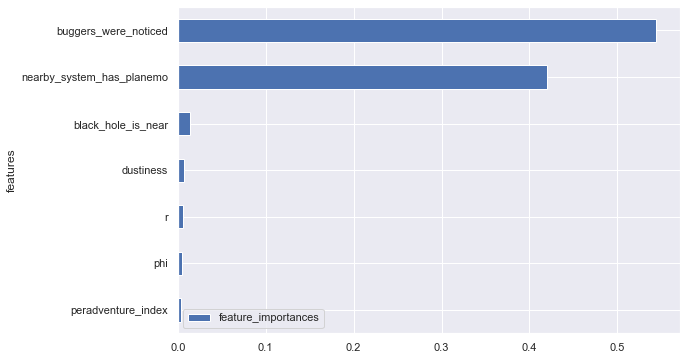

In [100]:
feature_importances_df.sort_values('feature_importances',ascending=True).plot.barh(x='features')

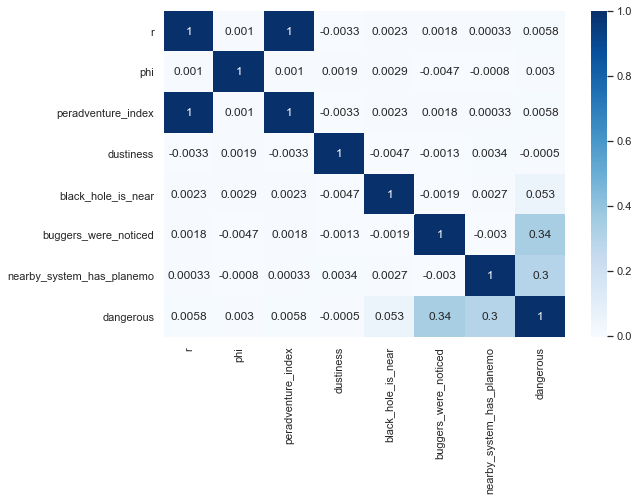

In [108]:
sns.heatmap(space_danger_data.corr(),annot = True, annot_kws = {'size':12},cmap="Blues")